In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset=load_iris()
df_iris=pd.DataFrame(dataset['data'],columns=dataset['feature_names'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
x_train,x_test,y_train,y_test=train_test_split(df_iris.iloc[:,:],dataset['target'],test_size=.30,random_state=1)
#xtrain,xtest,ytrain,ytest=train_test_split(df_iris.iloc[:,:].dataset['target'],test_size=.30,random_state=1)

In [4]:
print(f'x_train shape {x_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

x_train shape (105, 4)
x_test shape (45, 4)
y_train shape (105,)
y_test shape (45,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=200,verbose=1)
model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.2s finished


RandomForestClassifier(n_estimators=200, verbose=1)

In [6]:
pv=model.predict(x_test)
pv

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(f'accuracy of model is {accuracy_score(y_test,pv)}')


accuracy of model is 0.9555555555555556


In [12]:
confusion_matrix(y_test,pv)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [13]:
model.feature_importances_

array([0.08624224, 0.03108724, 0.42534807, 0.45732245])

<BarContainer object of 4 artists>

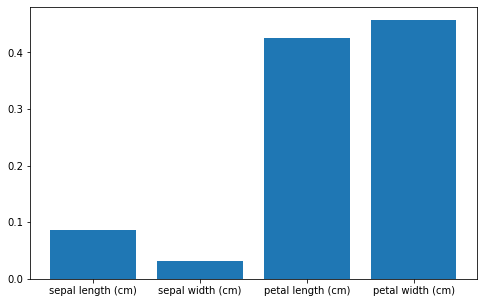

In [14]:
plt.figure(figsize=(8,5))
plt.bar(df_iris.columns,model.feature_importances_)

In [15]:
model.n_classes_

3

In [16]:
model.n_estimators

200

In [17]:
model.n_features_

4

In [18]:
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
export_graphviz(model.estimators_[5],out_file='tree.dot')

In [19]:
from subprocess import call #convert dot file into png file
call(['dot','-Tpng','tree.dot','o','tree.png','Gdpi=800'])

4